In [1]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from impedance.models.circuits import CustomCircuit
from impedance.visualization import plot_nyquist

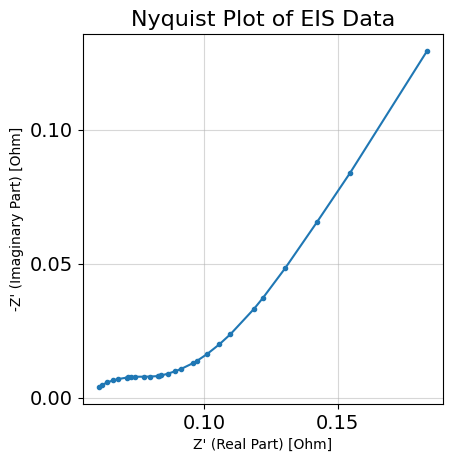

In [2]:
dataset = pd.read_csv('/Users/sushankmishra/Desktop/MTP_Materials/EIS Fitting/SoC Estimation on Li-ion Batteries A New EIS-based Dataset for data-driven applications/B01/EIS measurements/Test_1/Hioki/Hk_IFR14500_SoC_5_04-07-2023_05-13.csv')
f_x = dataset['Frequency(Hz)'].values  # Frequency in Hz
R = dataset['R(ohm)'].values
X = dataset['X(ohm)'].values
Z = R + 1j * X
Z_abs = np.abs(Z)
logx = np.logspace(0, 6, 10001)


plot_nyquist(Z)
plt.title("Nyquist Plot of EIS Data", fontsize=16)
plt.xlabel("Z' (Real Part) [Ohm]", fontsize=10)
plt.ylabel("-Z' (Imaginary Part) [Ohm]", fontsize=10)
plt.show()
# fig = plt.figure(figsize=(10,4), dpi=150)
# # plt.scatter(Z.real, -Z.imag, edgecolor='black', facecolor='None', marker='D', label='Sample')
# plt.scatter(Z.real, -Z.imag,  color='#4472C4', marker='o')
# plt.gca().set_aspect('equal', adjustable='box')
# plt.legend(fontsize=12)
# plt.title("Nyquist plot", fontsize=14)
# plt.xlabel("Z' (Real Part) [Ohm]")
# plt.ylabel("-Z' (Imaginary Part) [Ohm]")

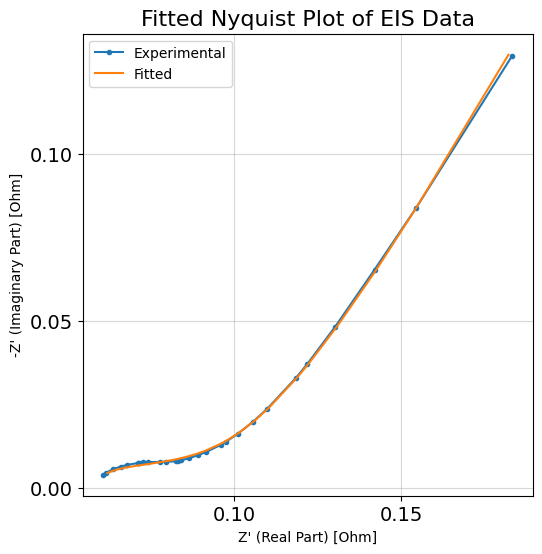

In [3]:
# !pip install impedance

# Define the modified circuit string
# circuit = 'R0-p(R1-CPE1)-p(R2-W1,CPE2)'
circuit = 'L1-R0-p(R1-CPE1)-p(R2-W1,CPE2)'


# Initial guess for parameters: [R0, R1, CPE1_T, CPE1_P, R2, CPE2_T, CPE2_P, W1_R, W1_T]
# initial_guess = [0.1, 50, 1e-5, 0.9, 200, 1e-5, 0.9, 1]
initial_guess = [0.1,0.1, 50, 1e-5, 0.9, 200, 1e-5, 0.9, 1]


# Create the circuit model
circuit_model = CustomCircuit(initial_guess=initial_guess, circuit=circuit)
circuit_model.fit(f_x, Z)

# Plot the fitted circuit model
fig, ax = plt.subplots(figsize=(6, 6))
plot_nyquist(Z, ax=ax)
plot_nyquist(circuit_model.predict(f_x), ax=ax, fmt='-')
ax.legend(['Experimental', 'Fitted'])
plt.grid(True)
plt.title("Fitted Nyquist Plot of EIS Data", fontsize=16)
plt.xlabel("Z' (Real Part) [Ohm]", fontsize=10)
plt.ylabel("-Z' (Imaginary Part) [Ohm]", fontsize=10)
plt.show()

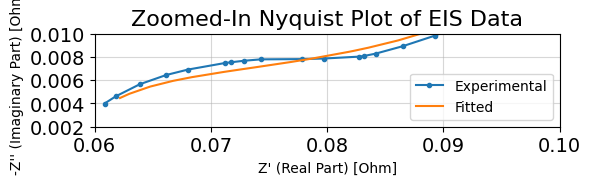

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_nyquist(Z, ax=ax)
plot_nyquist(circuit_model.predict(f_x), ax=ax, fmt='-')
ax.legend(['Experimental', 'Fitted'])
plt.grid(True)

# ⬇️ Add these lines to zoom in
ax.set_xlim(0.06, 0.1)    # Real part of impedance (Z')
ax.set_ylim(0.002, 0.01)    # Imaginary part of impedance (-Z'')

plt.title("Zoomed-In Nyquist Plot of EIS Data", fontsize=16)
plt.xlabel("Z' (Real Part) [Ohm]", fontsize=10)
plt.ylabel("-Z'' (Imaginary Part) [Ohm]", fontsize=10)
plt.show()

In [5]:
# After fitting
fitted_parameters = circuit_model.parameters_

# Extract parameter names
param_names = circuit_model.get_param_names()

nested_param_names = circuit_model.get_param_names()
param_names = [item for sublist in nested_param_names for item in (sublist if isinstance(sublist, list) else [sublist])]
params_dict = dict(zip(param_names, fitted_parameters))


# Print them
for name, value in params_dict.items():
    print(f"{name}: {value:.4g}")
params_df = pd.DataFrame([params_dict])
params_df.to_csv('fitted_parameters.csv', index=False)

L1: 2.374e-07
R0: 3.561e-09
R1: 3.561e-09
CPE1_0: 55.14
CPE1_1: 0.709
R2: 0.9786
W1: 0.05769
CPE2_0: 8.523
CPE2_1: 0.06462


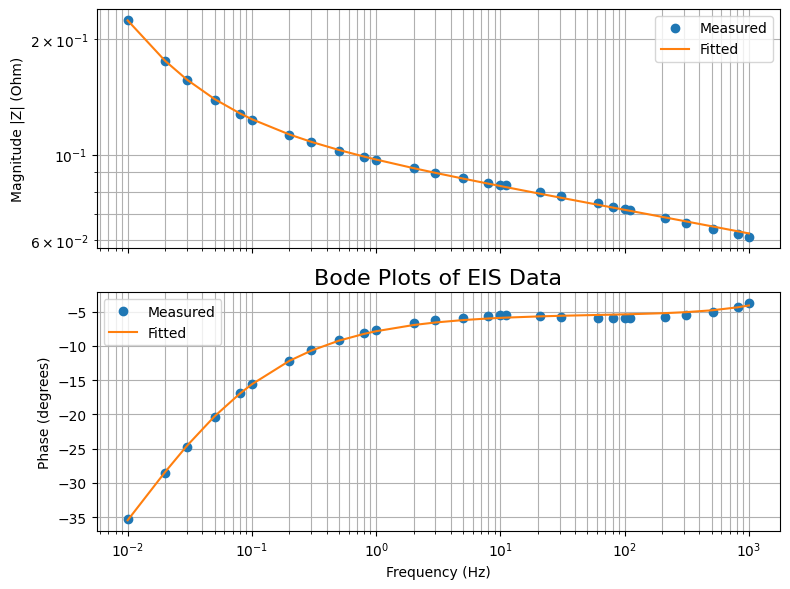

In [6]:
# Predict impedance from the fitted model
Z_fit = circuit_model.predict(f_x)

# Plot Bode plots: magnitude and phase vs frequency
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Magnitude plot (|Z|)
axs[0].loglog(f_x, np.abs(Z), 'o', label='Measured')
axs[0].loglog(f_x, np.abs(Z_fit), '-', label='Fitted')
axs[0].set_ylabel('Magnitude |Z| (Ohm)')
axs[0].legend()
axs[0].grid(True, which='both')

# Phase plot (in degrees)
axs[1].semilogx(f_x, np.angle(Z, deg=True), 'o', label='Measured')
axs[1].semilogx(f_x, np.angle(Z_fit, deg=True), '-', label='Fitted')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (degrees)')
axs[1].legend()
axs[1].grid(True, which='both')

plt.title("Bode Plots of EIS Data", fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
# pip install impedance